In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [301]:
df=pd.read_csv('ndtv_processed3.csv')

In [302]:
df.dropna(inplace=True)

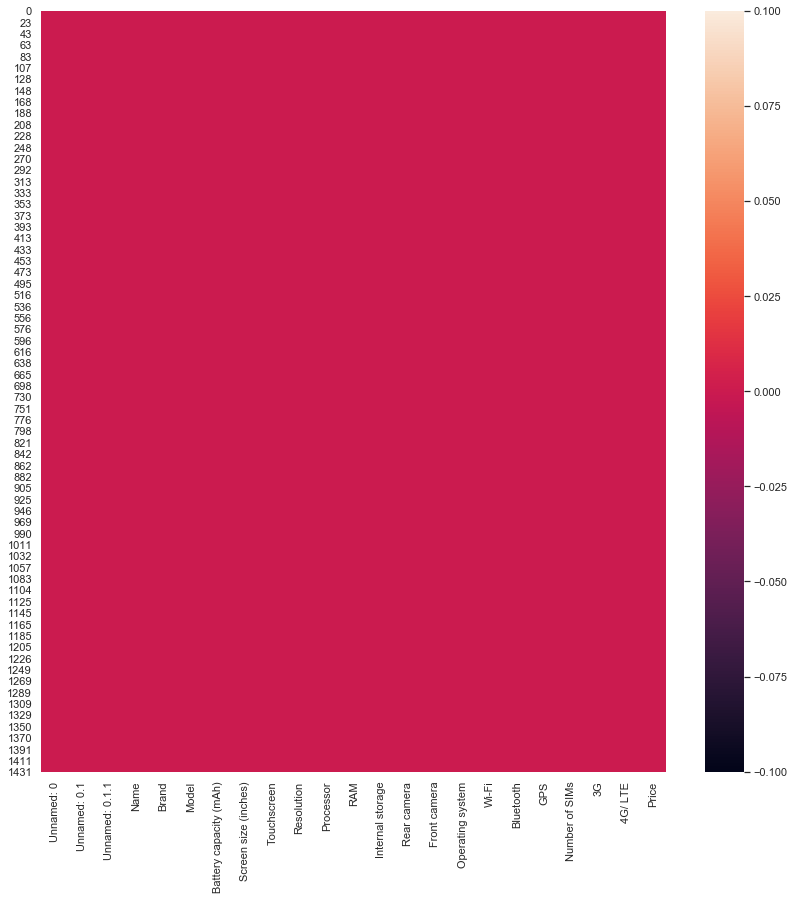

In [303]:
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(df.isnull())

In [304]:
len(df)

1359

In [305]:
df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1,inplace=True)

In [306]:
df

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution,Processor,RAM,Internal storage,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,"(1440, 3120)",octa-core,12GB,256GB,"48-megapixel (f/1.6, 0.8-micron) + 16-megapixe...","16-megapixel (f/2.0, 1.0-micron)",Android 10,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,"(1080, 2400)",octa-core,6GB,64GB,64-megapixel (f/1.8) + 13-megapixel (f/2.5) + ...,16-megapixel (f/2.0),Android 9 Pie,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,"(1242, 2688)",hexa-core,4GB,64GB,12-megapixel (f/1.8) + 12-megapixel (f/2.4) + ...,12-megapixel (f/2.2),iOS 13,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,"(828, 1792)",hexa-core,4GB,64GB,12-megapixel (f/1.8) + 12-megapixel (f/2.4),12-megapixel (f/2.2),iOS 13,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,"(1080, 2340)",octa-core,6GB,128GB,"12-megapixel (f/1.8, 1.4-micron) + 13-megapixe...","32-megapixel (f/1.9, 0.8-micron)",Android 9 Pie,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Intex Aqua A2,Intex,Aqua A2,1500,4.00,Yes,"(480, 800)",1.2GHz quad-core,512MB,8GB,5-megapixel,0.3-megapixel,Android 4.4,Yes,Yes,Yes,2,Yes,No,2599
1447,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,Yes,"(480, 854)",1.2GHz quad-core,1GB,8GB,8-megapixel,5-megapixel,Android 4.4.2,Yes,Yes,Yes,2,Yes,No,2940
1448,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,Yes,"(480, 854)",1GHz dual-core,512MB,4GB,5-megapixel,2-megapixel,Android 4.4.2,Yes,Yes,No,2,Yes,No,2999
1449,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,Yes,"(480, 800)",1GHz one-core,256MB,512MB,2-megapixel,0.3-megapixel,Android 4.4,Yes,Yes,Yes,2,Yes,No,2498


In [307]:
import re
t=re.findall(r'\d+',df['Resolution'].iloc[0])

In [308]:
z=df.apply(lambda x:re.findall(r'\d+',x['Resolution']),axis=1)

In [309]:
z

0       [1440, 3120]
1       [1080, 2400]
2       [1242, 2688]
3        [828, 1792]
4       [1080, 2340]
            ...     
1446      [480, 800]
1447      [480, 854]
1448      [480, 854]
1449      [480, 800]
1450      [480, 854]
Length: 1359, dtype: object

In [310]:
z1=list(z)

In [311]:
data = pd.DataFrame(z1, columns =['x', 'y']) 

In [312]:
data

,x,y
0,1440,3120
1,1080,2400
2,1242,2688
3,828,1792
4,1080,2340
...,...,...
1354,480,800
1355,480,854
1356,480,854
1357,480,800


In [313]:
w=data.apply(lambda x:x[0],axis=1)

In [314]:
w=pd.Series.to_frame(w)

In [315]:
w1=data.apply(lambda x:x[1],axis=1)

In [316]:
w1=pd.Series.to_frame(w1)

In [317]:
w = w.set_index(df.index)
w1= w1.set_index(df.index)

In [318]:
df.insert(6, 'Resolution x', w.iloc[:,0].values,True)

In [319]:
df.insert(7, 'Resolution y', w1.iloc[:,0].values,True)

In [320]:
df

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Resolution,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,"(1440, 3120)",octa-core,...,"48-megapixel (f/1.6, 0.8-micron) + 16-megapixe...","16-megapixel (f/2.0, 1.0-micron)",Android 10,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,"(1080, 2400)",octa-core,...,64-megapixel (f/1.8) + 13-megapixel (f/2.5) + ...,16-megapixel (f/2.0),Android 9 Pie,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,"(1242, 2688)",hexa-core,...,12-megapixel (f/1.8) + 12-megapixel (f/2.4) + ...,12-megapixel (f/2.2),iOS 13,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,"(828, 1792)",hexa-core,...,12-megapixel (f/1.8) + 12-megapixel (f/2.4),12-megapixel (f/2.2),iOS 13,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,"(1080, 2340)",octa-core,...,"12-megapixel (f/1.8, 1.4-micron) + 13-megapixe...","32-megapixel (f/1.9, 0.8-micron)",Android 9 Pie,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Intex Aqua A2,Intex,Aqua A2,1500,4.00,Yes,480,800,"(480, 800)",1.2GHz quad-core,...,5-megapixel,0.3-megapixel,Android 4.4,Yes,Yes,Yes,2,Yes,No,2599
1447,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,Yes,480,854,"(480, 854)",1.2GHz quad-core,...,8-megapixel,5-megapixel,Android 4.4.2,Yes,Yes,Yes,2,Yes,No,2940
1448,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,Yes,480,854,"(480, 854)",1GHz dual-core,...,5-megapixel,2-megapixel,Android 4.4.2,Yes,Yes,No,2,Yes,No,2999
1449,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,Yes,480,800,"(480, 800)",1GHz one-core,...,2-megapixel,0.3-megapixel,Android 4.4,Yes,Yes,Yes,2,Yes,No,2498


In [326]:
df['Resolution x'] = df['Resolution x'].astype(int)
df['Resolution y'] = df['Resolution y'].astype(int)

In [327]:
df.drop(['Resolution'],axis=1,inplace=True)

In [328]:
df

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,octa-core,12GB,...,"48-megapixel (f/1.6, 0.8-micron) + 16-megapixe...","16-megapixel (f/2.0, 1.0-micron)",Android 10,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,octa-core,6GB,...,64-megapixel (f/1.8) + 13-megapixel (f/2.5) + ...,16-megapixel (f/2.0),Android 9 Pie,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,hexa-core,4GB,...,12-megapixel (f/1.8) + 12-megapixel (f/2.4) + ...,12-megapixel (f/2.2),iOS 13,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,hexa-core,4GB,...,12-megapixel (f/1.8) + 12-megapixel (f/2.4),12-megapixel (f/2.2),iOS 13,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,octa-core,6GB,...,"12-megapixel (f/1.8, 1.4-micron) + 13-megapixe...","32-megapixel (f/1.9, 0.8-micron)",Android 9 Pie,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Intex Aqua A2,Intex,Aqua A2,1500,4.00,Yes,480,800,1.2GHz quad-core,512MB,...,5-megapixel,0.3-megapixel,Android 4.4,Yes,Yes,Yes,2,Yes,No,2599
1447,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,Yes,480,854,1.2GHz quad-core,1GB,...,8-megapixel,5-megapixel,Android 4.4.2,Yes,Yes,Yes,2,Yes,No,2940
1448,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,Yes,480,854,1GHz dual-core,512MB,...,5-megapixel,2-megapixel,Android 4.4.2,Yes,Yes,No,2,Yes,No,2999
1449,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,Yes,480,800,1GHz one-core,256MB,...,2-megapixel,0.3-megapixel,Android 4.4,Yes,Yes,Yes,2,Yes,No,2498


In [329]:
len(df['Processor'].unique())

142

In [330]:
len(df['Operating system'].unique())

85

In [331]:
def ram(x):
    for i in re.findall(r'\d+',x):
        if 'GB' in x:
            return int(i)*1000
        else:
            return int(i)

In [332]:
df['RAM']=df['RAM'].apply(ram)

In [333]:
df.rename(columns = {'RAM':'RAM (MB)'}, inplace = True) 

In [334]:
def store(x):
    for i in re.findall(r'\d+',x):
        if 'MB' in x:
            return float(i)/1000
        else:
            return float(i)

In [335]:
df['Internal storage']=df['Internal storage'].apply(store)

In [338]:
df.rename(columns = {'Internal storage':'Internal storage (GB)'}, inplace = True) 

In [339]:
df['Internal storage (GB)']

0       256.000
1        64.000
2        64.000
3        64.000
4       128.000
         ...   
1446      8.000
1447      8.000
1448      4.000
1449      0.512
1450      8.000
Name: Internal storage (GB), Length: 1359, dtype: float64

In [344]:
df.to_csv('ndtv_processed4.csv')

In [345]:
new=pd.read_csv('ndtv_processed4.csv')

In [346]:
new['Processor'].unique()

array(['octa-core', 'hexa-core',
       '1.9GHz octa-core (4x1.9GHz + 2x2.4GHz + 2x2.7GHz)',
       '2.6GHz octa-core', '2.2GHz octa-core',
       '2.2GHz octa-core (2x2.2GHz + 6x1.7GHz)',
       '1.8GHz octa-core (6x1.8GHz + 2x2.2GHz)', '2.8GHz octa-core',
       '2.6GHz octa-core (2x2.6GHz + 2x1.92GHz + 4x1.8GHz)',
       '2GHz octa-core', 'octa-core (2x2.6GHz + 2x1.92GHz + 4x1.8GHz)',
       'octa-core (4x2.8GHz)', '2.5GHz octa-core (4x2.5GHz + 4x1.6GHz)',
       '2.96GHz octa-core (4x2.96GHz + 4x1.7GHz)', '1.7GHz octa-core',
       '1.8GHz octa-core', '1.8GHz octa-core (4x2.36GHz + 4x1.8GHz)',
       '2.8GHz octa-core (4x2.8GHz + 4x1.7GHz)',
       'octa-core (4x2.7GHz + 4x1.7GHz)',
       'octa-core (4x2.2GHz + 4x1.8GHz)', '2.45GHz octa-core',
       'octa-core (4x2.3GHz + 4x1.7GHz)', '2.39GHz hexa-core',
       '2.35GHz octa-core', '1.9GHz octa-core',
       'octa-core (4x2.35GHz + 4x1.9GHz)', 'one-core', '1.6GHz quad-core',
       '1.44GHz octa-core', 'quad-core', '2.34GHz quad-

In [347]:
def pro(x):
    if 'one' in x:
        return 1
    elif 'dual' in x:
        return 2
    elif 'quad' in x:
        return 4
    elif 'hexa' in x:
        return 6
    elif 'octa' in x:
        return 8
    elif 'deca' in x:
        return 10
    else:
        return 8

In [348]:
new['Processor']=new['Processor'].apply(pro)

In [349]:
new

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,"48-megapixel (f/1.6, 0.8-micron) + 16-megapixe...","16-megapixel (f/2.0, 1.0-micron)",Android 10,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64-megapixel (f/1.8) + 13-megapixel (f/2.5) + ...,16-megapixel (f/2.0),Android 9 Pie,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12-megapixel (f/1.8) + 12-megapixel (f/2.4) + ...,12-megapixel (f/2.2),iOS 13,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12-megapixel (f/1.8) + 12-megapixel (f/2.4),12-megapixel (f/2.2),iOS 13,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,"12-megapixel (f/1.8, 1.4-micron) + 13-megapixe...","32-megapixel (f/1.9, 0.8-micron)",Android 9 Pie,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1446,Intex Aqua A2,Intex,Aqua A2,1500,4.00,Yes,480,800,4,...,5-megapixel,0.3-megapixel,Android 4.4,Yes,Yes,Yes,2,Yes,No,2599
1355,1447,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,Yes,480,854,4,...,8-megapixel,5-megapixel,Android 4.4.2,Yes,Yes,Yes,2,Yes,No,2940
1356,1448,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,Yes,480,854,2,...,5-megapixel,2-megapixel,Android 4.4.2,Yes,Yes,No,2,Yes,No,2999
1357,1449,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,Yes,480,800,1,...,2-megapixel,0.3-megapixel,Android 4.4,Yes,Yes,Yes,2,Yes,No,2498


In [399]:
def rear(x):
    return x.split('-')[0]

In [406]:
new['Rear camera']=new['Rear camera'].apply(rear)

In [409]:
new['Rear camera'].iloc[922]=0
new['Rear camera'].iloc[1000]=0

In [411]:
new['Rear camera'] = new['Rear camera'].astype(float)

In [429]:
new['Front camera']=new['Front camera'].apply(rear)

In [431]:
new['Front camera']=new['Front camera'].apply(lambda x:0 if 'No' in x else x)

In [434]:
new['Front camera'].iloc[538]=4
new['Front camera'].iloc[1021]=0.3
new['Front camera'].iloc[1029]=0.3
new['Front camera'].iloc[1263]=4

In [435]:
new['Front camera'] = new['Front camera'].astype(float)
new['Front camera'].unique()

array([16. , 12. , 32. , 10. , 24. , 20. , 25. , 13. ,  8. ,  7. ,  5. ,
        4. , 48. ,  0.3,  1.2,  2. ,  2.2,  3.7,  1.9,  1.3,  2.1,  2.4,
        0.9,  1.6,  0. ,  3. ,  1.1,  1.5,  3.2, 40. ])

In [398]:
new['Operating system'].unique()

array(['Android 10', 'Android 9 Pie', 'iOS 13', 'Android 9',
       'Android Pie', 'Android 9.0 Pie', 'Android 9.0', 'Android 8.1',
       'iOS 12', 'Android 8.0', 'Android 8.1 Oreo', 'Android 7.1.1',
       'iOS 11', 'Android 7.1', 'Android 7.0', 'Android 6.0.1',
       'Android 6.0', 'iOS 10', 'Android 5.1.1', 'iOS 9',
       'Cyanogen OS 12', 'Android 5.0', 'Cyanogen OS 11', 'Android 4.3',
       'Android v9.0 (Pie)', 'Android Android 9 Pie',
       'Android Android 9.0 Pie', 'Android 8.0 Oreo', 'Android',
       'Android 7.1.2', 'Android 8.0.0', 'KAI OS', 'Android 5.1',
       'iOS 9.3', 'Android 5.0.2', 'Android 4.4.4', 'Android 4.4',
       'BlackBerry OS 10.3', 'iOS 8.0', 'CyanogenMod 11S',
       'Android 4.4.2', 'Android 4.2', 'Windows Phone 8', 'iOS 7',
       'Android 4.2.2', 'Android 4.1', 'Android 4',
       'Android 8.1 Oreo (Go edition)', 'Android 8.2 Oreo',
       'Android Oreo', 'Cyanogen OS 12.1', 'Windows Phone 8.1',
       'Nokia X platform 1.0', 'Nokia Asha platfor

In [442]:
def os(x):
    if 'iOS' in x:
        return 'iOS'
    elif 'Windows' in x:
        return 'Windows'
    elif 'Android' in x:
        return 'Android'
    elif 'Cyanogen' in x:
        return 'Cyanogen'
    elif 'Tizen' in x:
        return 'Tizen'
    elif 'Sailfish' in x:
        return 'Sailfish'
    elif 'BlackBerry' in x:
        return 'BlackBerry'
    else:
        return 'Cyanogen'

In [445]:
new['Operating system']=new['Operating system'].apply(os)

In [449]:
new.drop(['Unnamed: 0'],axis=1,inplace=True)

In [450]:
new

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Intex Aqua A2,Intex,Aqua A2,1500,4.00,Yes,480,800,4,512,...,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2599
1355,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,Yes,480,854,4,1000,...,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,2940
1356,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,Yes,480,854,2,512,...,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,2999
1357,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,Yes,480,800,1,256,...,2.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2498


In [451]:
new.to_csv('ndtv_final.csv')

In [453]:
new['Operating system'].value_counts()

Android       1299
Windows         19
iOS             17
Cyanogen        10
BlackBerry      10
Tizen            3
Sailfish         1
Name: Operating system, dtype: int64